In [4]:
# Importing Dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.activations import relu, sigmoid, tanh
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load breast cancer dataset
def load_data():
    data = load_breast_cancer()
    return data.data, data.target

In [6]:
# Split data into training and testing sets
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

In [7]:
# Define the model architecture
def create_model(activation_func, optimizer, input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation=activation_func),
        Dropout(0.5),
        Dense(32, activation=activation_func),
        Dropout(0.5),
        Dense(1, activation=sigmoid)
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [8]:
# Train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=50, batch_size=16):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return history, loss, accuracy

In [9]:
# Define hyperparameters to tune
activation_functions = [relu, sigmoid, tanh]
optimizer_classes = [SGD, Adam, RMSprop]
learning_rates = [0.001, 0.01, 0.1]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation Function: relu, Optimizer: SGD, Learning Rate: 0.001
Test Loss: 0.663, Test Accuracy: 0.623


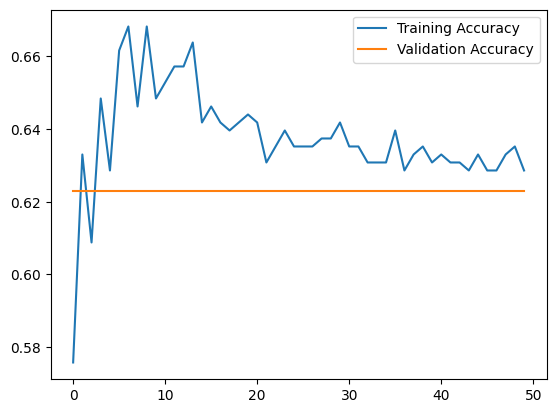

Activation Function: relu, Optimizer: SGD, Learning Rate: 0.01
Test Loss: 0.529, Test Accuracy: 0.816


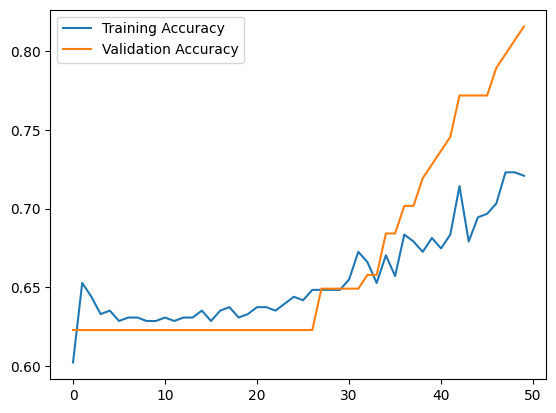

Activation Function: relu, Optimizer: SGD, Learning Rate: 0.1
Test Loss: 0.474, Test Accuracy: 0.754


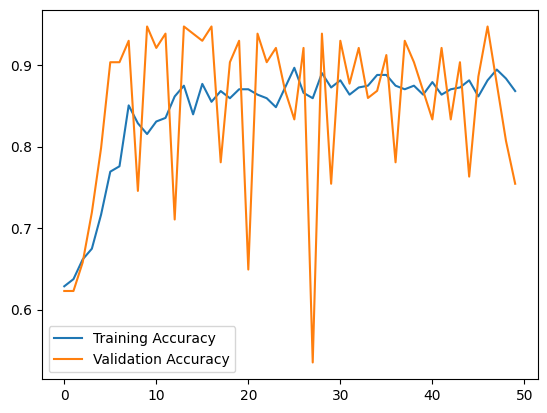

Activation Function: relu, Optimizer: Adam, Learning Rate: 0.001
Test Loss: 0.261, Test Accuracy: 0.895


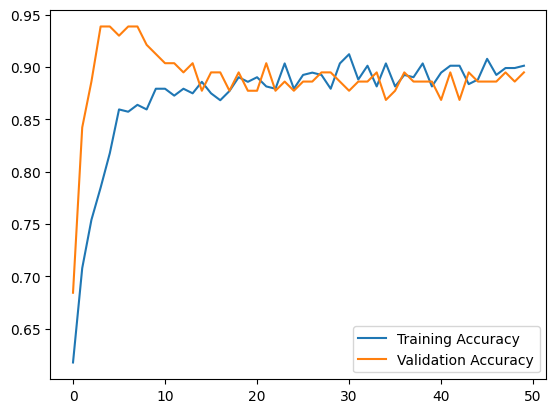

Activation Function: relu, Optimizer: Adam, Learning Rate: 0.01
Test Loss: 0.298, Test Accuracy: 0.860


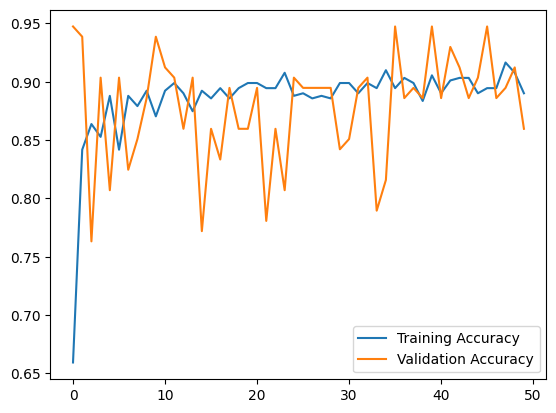

Activation Function: relu, Optimizer: Adam, Learning Rate: 0.1
Test Loss: 0.163, Test Accuracy: 0.947


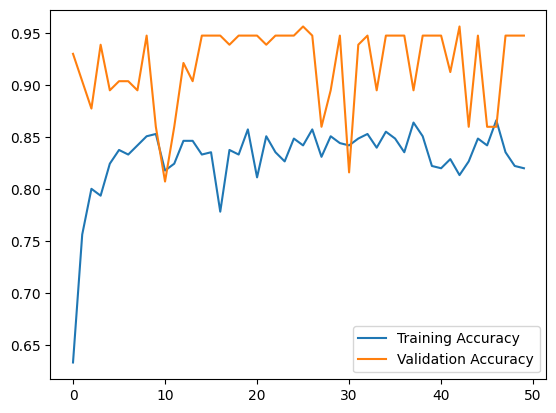

Activation Function: relu, Optimizer: RMSprop, Learning Rate: 0.001
Test Loss: 0.264, Test Accuracy: 0.868


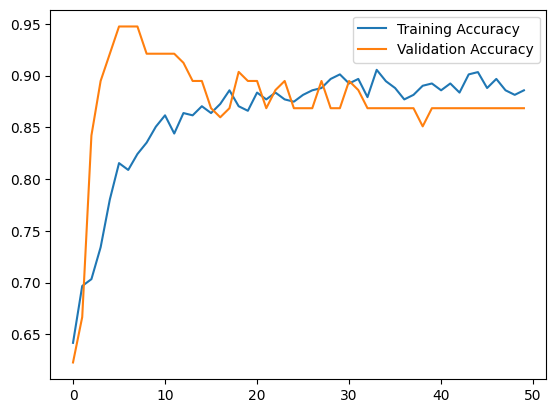

Activation Function: relu, Optimizer: RMSprop, Learning Rate: 0.01
Test Loss: 0.199, Test Accuracy: 0.930


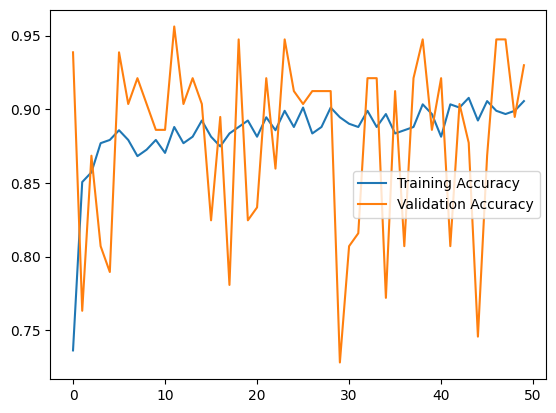

Activation Function: relu, Optimizer: RMSprop, Learning Rate: 0.1
Test Loss: 0.842, Test Accuracy: 0.754


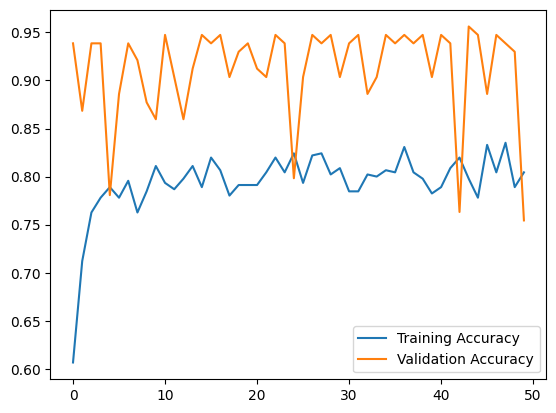

Activation Function: sigmoid, Optimizer: SGD, Learning Rate: 0.001
Test Loss: 0.664, Test Accuracy: 0.623


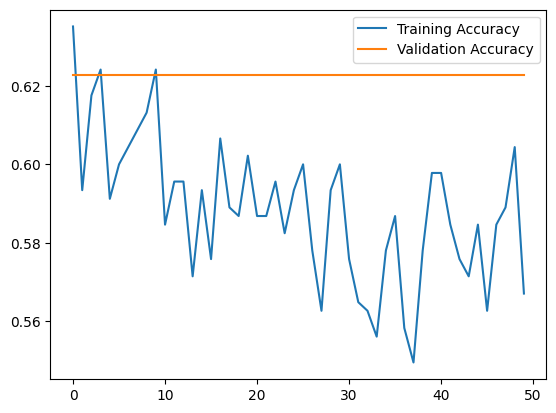

Activation Function: sigmoid, Optimizer: SGD, Learning Rate: 0.01
Test Loss: 0.661, Test Accuracy: 0.623


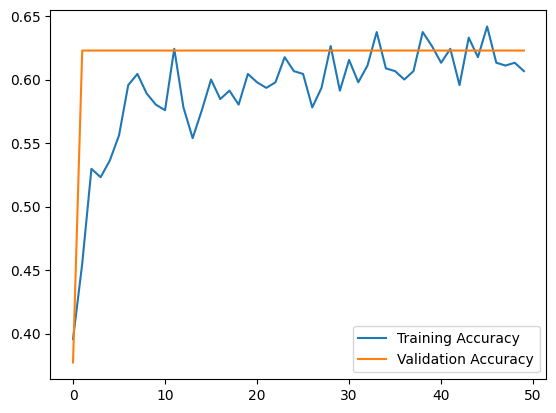

Activation Function: sigmoid, Optimizer: SGD, Learning Rate: 0.1
Test Loss: 0.666, Test Accuracy: 0.623


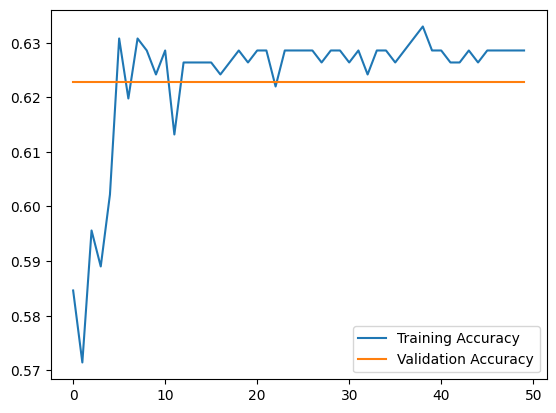

Activation Function: sigmoid, Optimizer: Adam, Learning Rate: 0.001
Test Loss: 0.595, Test Accuracy: 0.649


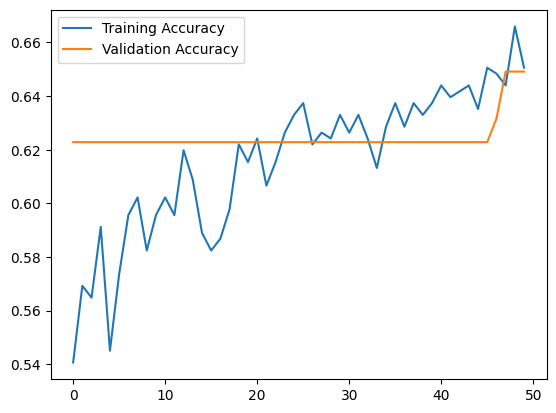

Activation Function: sigmoid, Optimizer: Adam, Learning Rate: 0.01
Test Loss: 0.203, Test Accuracy: 0.912


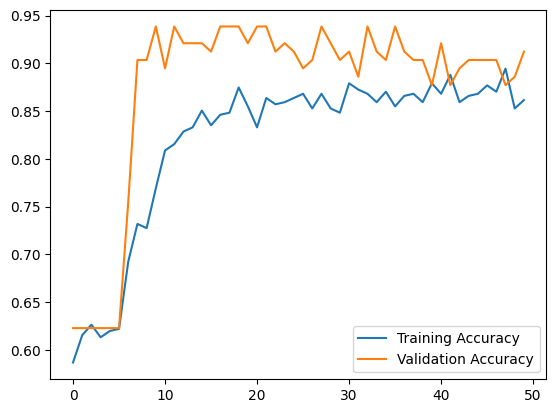

Activation Function: sigmoid, Optimizer: Adam, Learning Rate: 0.1
Test Loss: 0.190, Test Accuracy: 0.904


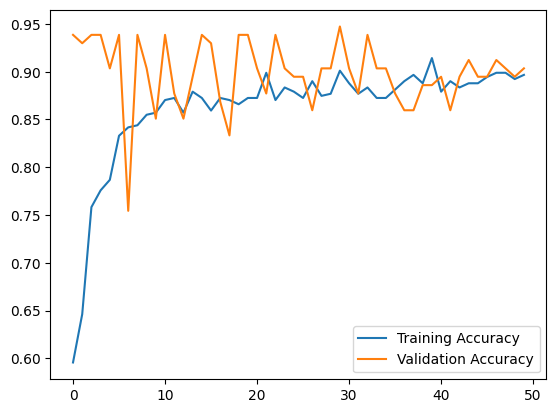

Activation Function: sigmoid, Optimizer: RMSprop, Learning Rate: 0.001
Test Loss: 0.613, Test Accuracy: 0.623


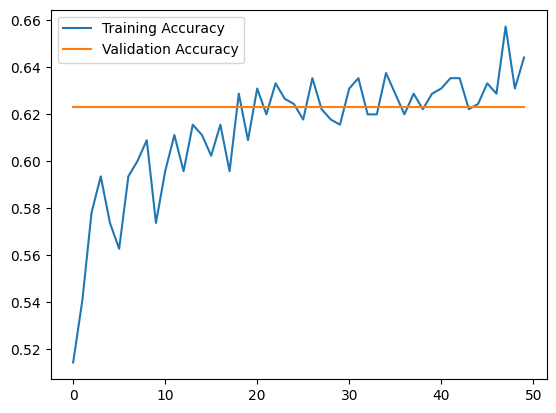

Activation Function: sigmoid, Optimizer: RMSprop, Learning Rate: 0.01
Test Loss: 0.271, Test Accuracy: 0.877


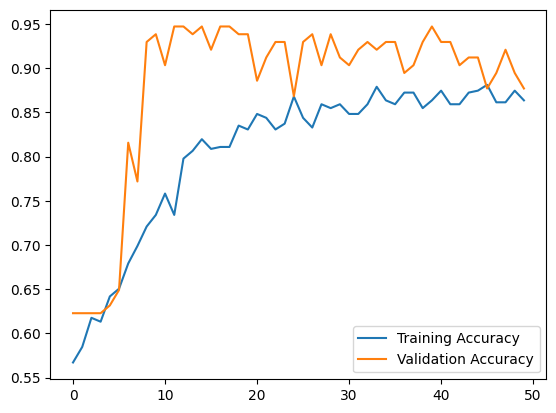

Activation Function: sigmoid, Optimizer: RMSprop, Learning Rate: 0.1
Test Loss: 0.345, Test Accuracy: 0.781


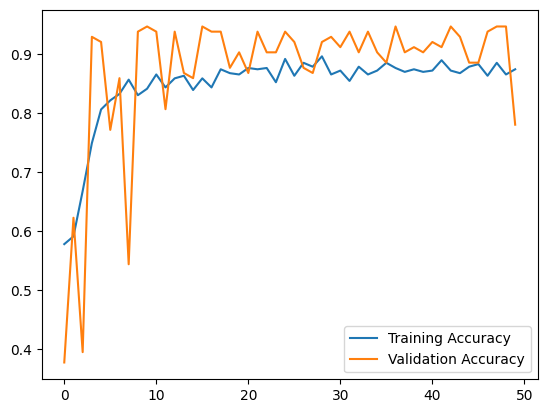

Activation Function: tanh, Optimizer: SGD, Learning Rate: 0.001
Test Loss: 0.654, Test Accuracy: 0.623


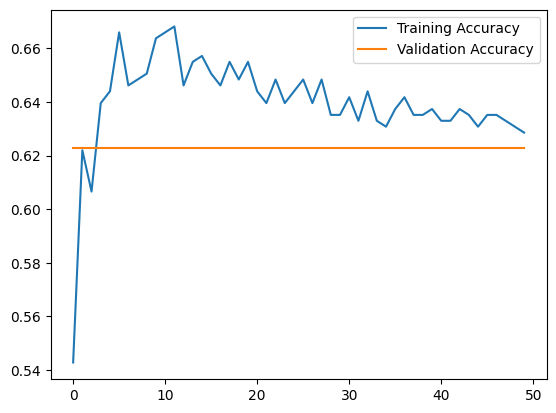

Activation Function: tanh, Optimizer: SGD, Learning Rate: 0.01
Test Loss: 0.311, Test Accuracy: 0.930


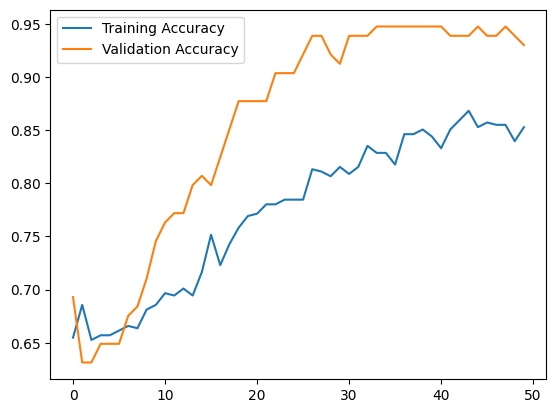

Activation Function: tanh, Optimizer: SGD, Learning Rate: 0.1
Test Loss: 0.270, Test Accuracy: 0.877


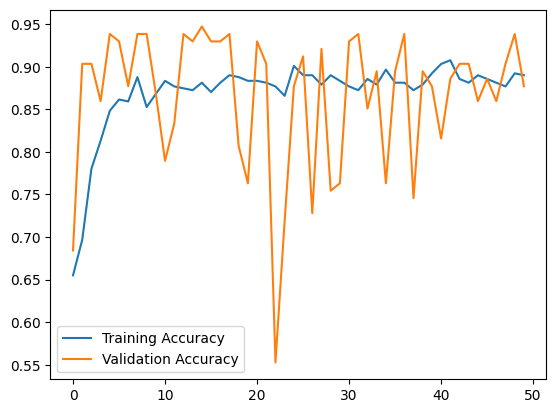

Activation Function: tanh, Optimizer: Adam, Learning Rate: 0.001
Test Loss: 0.216, Test Accuracy: 0.895


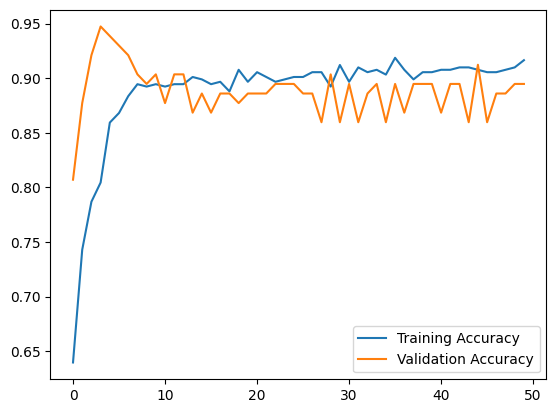

Activation Function: tanh, Optimizer: Adam, Learning Rate: 0.01
Test Loss: 0.386, Test Accuracy: 0.825


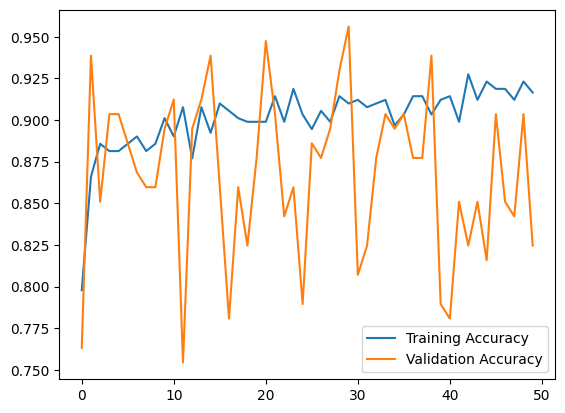

Activation Function: tanh, Optimizer: Adam, Learning Rate: 0.1
Test Loss: 0.140, Test Accuracy: 0.947


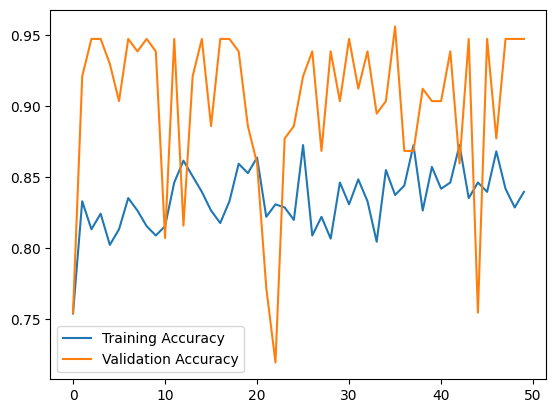

Activation Function: tanh, Optimizer: RMSprop, Learning Rate: 0.001
Test Loss: 0.286, Test Accuracy: 0.868


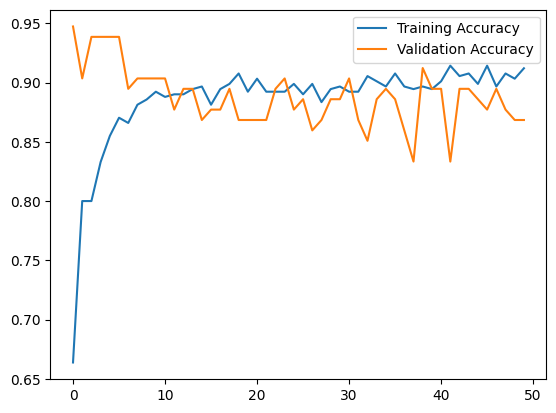

Activation Function: tanh, Optimizer: RMSprop, Learning Rate: 0.01
Test Loss: 0.233, Test Accuracy: 0.895


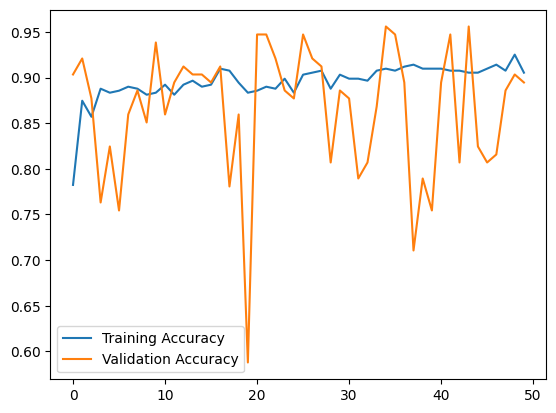

Activation Function: tanh, Optimizer: RMSprop, Learning Rate: 0.1
Test Loss: 0.193, Test Accuracy: 0.921


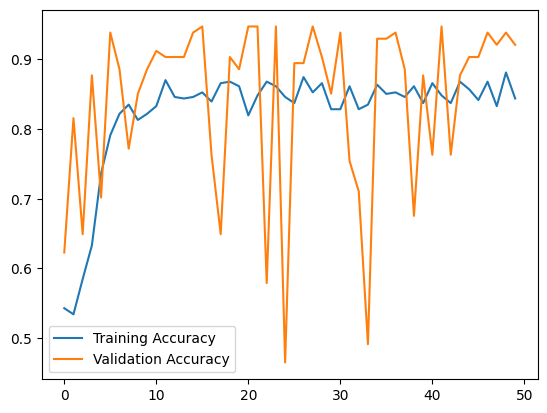

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Best Model Confusion Matrix:
[[38  5]
 [ 1 70]]


In [10]:
# Main function
def main():
    X, y = load_data()
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Normalize input data
    X_train = X_train / np.max(X_train)
    X_test = X_test / np.max(X_test)

    # Initialize best model and its performance
    best_model = None
    best_accuracy = 0

    # Perform hyperparameter tuning
    for activation_func in activation_functions:
        for optimizer_class in optimizer_classes:
            for learning_rate in learning_rates:
                optimizer = optimizer_class(learning_rate=learning_rate)
                model = create_model(activation_func, optimizer, X_train.shape[1])
                history, loss, accuracy = train_and_evaluate(model, X_train, y_train, X_test, y_test)

                # Print model performance
                print(f"Activation Function: {activation_func.__name__}, Optimizer: {optimizer_class.__name__}, Learning Rate: {learning_rate}")
                print(f"Test Loss: {loss:.3f}, Test Accuracy: {accuracy:.3f}")

                # Update best model if necessary
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model

                # Plot training and validation accuracy
                plt.plot(history.history['accuracy'], label='Training Accuracy')
                plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
                plt.legend()
                plt.show()

    # Evaluate best model on test data
    y_pred = best_model.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype(int)
    print("Best Model Classification Report:")
    print(classification_report(y_test, y_pred_class))
    print("Best Model Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_class))

if __name__ == "__main__":
    main()